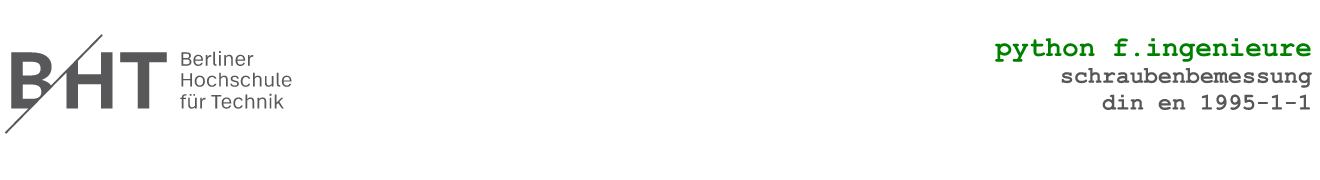

# Anwendungsbeispiel 2: Schraubenbemessung 

## Erstellung einer Funktion

Die Berechnung der Tragfähigkeiten wird in den folgenden Kapiteln als Grundlage verwendet, sodass nun eine Funktion erstellt wird, die die Axial- und Schertragfähigkeit einer Vollgewindeschraube berechnet.

```python
ec5_87_tragfähigkeit_vg(Hersteller,d,L,t_1,t_2,t_Blech,rho_k,alpha)
```

Als Eingabeparameter werden die folgenden Variablen eingesetzt:

- **Hersteller**: 'Würth' (als Platzhalter für eine mögliche Erweiterung)
- **d**: Durchmesser der Schraube in mm (6,8,10,12)
- **L**: Länge der Schraube in mm
- **t_1**: Dicke des Seitenholzes 1 in mm
- **t_2**: Dicke des Seitenholzes 2 in mm
- **t_Blech**: Dicke des Stahlblechs in mm
- **rho_k**: Rohdichte des Holzes
- **alpha**: Winkel der Kraft zur Faserrichtung in Grad (0-90)

Beim Definieren der Funktion müssen alle Möglichkeiten berücksichtigt werden, die beim Ausführen zu Fehlermeldungen führen können. Eine Fehlermeldung wird der Liste ``` nw ``` angehängt und ausgegeben. Folgende Szenarien müssen beachtet werden:

Es werden nur einschnittige Verbindungen berechnet. Es dürfen nicht alle drei Dicken ungleich 0 sein.
```python
t_Blech != 0 and t_1 != 0 and t_2 != 0
```
Es dürfen nicht alle drei Dicken gleich 0 sein.
```python
t_Blech == 0 and t_1 == 0 and t_2 == 0
```
Die Schraubenlänge darf nicht gleich der Dicke des Seitenholzes 1 oder des Blechs sein.
```python
L in [t_1, t_Blech]
```
Für eine einschnittige Verbindung darf die Dicke des Seitenholzes 2 und des Blechs gleich 0 sein.
```python
t_Blech == 0 and t_2 == 0
```
**Holz-Holz Verbindung** <br>
Für eine Holz-Holz Verbindung darf die Dicke des Seitenholzes 1 nicht größer als die Schraubenlänge sein.
```python
t_Blech == 0 and t_1 > L
```
Für eine Holz-Holz Verbindung darf die Summe der Dicken des Seitenholzes 1 und 2 nicht größer als die Schraubenlänge sein.
```python
L >= (t_1+t_2) and t_Blech == 0
```
**Stahl-Holz Verbindung**<br>
Für eine Stahl-Holz Verbindung darf die Dicke des Seitenholzes 1 nicht gleich null sein.
```python
t_Blech != 0 and t_1 == 0 and t_2 != 0
```
Für eine Stahl-Holz Verbindung darf die Schraubenlänge nicht größer als die Summe der Dicke des Blechs und des Seitenholzes 1 sein.
```python
L >= (t_Blech+t_1) and t_2 == 0
```
Nachfolgend ist der Code der Funktion dargestellt.

In [26]:
# Schraubenbemessungsprogramm: Funktionen - Axial- und Schertragfähigkeit von Würth Vollgewindeschrauben
# Bibliotheken
import streamlit as st
import pandas as pd
from math import sqrt, pi, cos, sin

# Funktion
def ec5_87_tragfähigkeit_vg(Hersteller, d, L, t_1, t_2, t_Blech, rho_k, alpha):

    # Nachweisführung
    nw = []

    #__________Fehlermeldungen__________

    if t_Blech != 0 and t_1 != 0 and t_2 != 0:
        fehler = "Error: Es werden keine zweischnittigen Verbindungen berechnet."
        hinweis = "Hinweis: t_Blech <> 0 and t_1 <> 0 and t_2 <> 0"
        nw.append(fehler)
        nw.append(hinweis)
        F_axRk = 0
        F_vRk = 0
        return F_axRk, F_vRk, nw

    elif t_Blech == 0 and t_1 == 0 and t_2 == 0:
        fehler = "Error: Die Dicken sind unzulässig."
        hinweis = "Hinweis: t_Blech = 0 and t_1 = 0 and t_2 = 0"
        nw.append(fehler)
        nw.append(hinweis)
        F_axRk = 0
        F_vRk = 0
        return F_axRk, F_vRk, nw

    elif L in [t_1, t_Blech]:
        fehler = "Error: Die Dicken sind unzulässig."
        hinweis = "Hinweis: L = t_1 or L = t_Blech"
        nw.append(fehler)
        nw.append(hinweis)
        F_axRk = 0
        F_vRk = 0
        return F_axRk, F_vRk, nw

    elif t_Blech == 0 and t_2 == 0:
        fehler = "Error: Die Dicken sind unzulässig."
        hinweis = "Hinweis: t_Blech = 0 and t_2 = 0"
        nw.append(fehler)
        nw.append(hinweis)
        F_axRk = 0
        F_vRk = 0
        return F_axRk, F_vRk, nw

    elif t_Blech == 0 and t_1 > L:
        fehler = "Error: Die Dicken sind unzulässig."
        hinweis = "Hinweis: t_Blech = 0 and t_1 > L"
        nw.append(fehler)
        nw.append(hinweis)
        F_axRk = 0
        F_vRk = 0
        return F_axRk, F_vRk, nw

    ## Holz-Stahl-Verbindungen
    elif t_Blech != 0 and t_1 == 0 and t_2 != 0:
        fehler = "Bei Stahl-Holz Verbindungen darf die Seitenholzdicke 1 nicht gleich null sein."
        hinweis = "Hinweis: t_Blech <> 0 and t_1 = 0"
        nw.append(fehler)
        nw.append(hinweis)
        F_axRk = 0
        F_vRk = 0
        return F_axRk, F_vRk, nw

    else:
        #__________Vorbereitung__________

        nw.append('success')

        # Listen
        # herstellerspezifische Kennwerte
        if Hersteller == 'Würth':
            # WÜrth
            L_d = [6, 8, 10, 12]
            L_f_axk = [11.5, 11, 10, 10]
            L_f_tensk = [11, 20, 32, 45]
            L_d_h = [14, 22, 25.2, 29.4]
            L_f_head = [13, 13, 10, 10]

        # Bearbeitung der Eingabwerte
        # Index
        index = L_d.index(d)

        # Zugriff auf Listenelemente
        d_h = L_d_h[index]
        f_head = L_f_head[index]
        f_axk = L_f_axk[index]
        f_1k = 80 * 10**(-6) * rho_k**2  # N/mm2
        f_2k = 80 * 10**(-6) * rho_k**2  # N/mm2 Kopfdurchziehparameter
        f_tensk = L_f_tensk[index]
        M_yrk = 0.15 * 600 * d**(2.6)
        f_hk = (0.082 * rho_k * d**(-0.3))

        # Umrechnung in Bogenmaß
        alph = alpha * pi / 180

        # Effektive Länge der Schraube
        if t_Blech != 0:
            l_ef = L - t_Blech
        elif t_Blech == 0:
            l_ef = min(L - t_1, t_1)

        #__________Axialtragfähigkeit__________

        # Ausziehwiderstand
        if alpha <= 45:
            k_axk = 0.3 + (0.7 * alpha) / 45
        else:
            k_axk = 1

        F_axrk1 = (k_axk * f_axk * d * l_ef) * (rho_k / 350)**0.8  # N

        # Umrechnung in Kilonewton
        F_axRk1 = F_axrk1 / 1000  # kN

        # Kopfdurchziehwiderstand
        F_headrk = f_head * (d_h)**2 * (rho_k / 350)**0.8  # N

        # Umrechnung in Kilonewton
        F_headRk = F_headrk / 1000  # kN

        # Zugfestigkeit
        F_tRk = f_tensk  # kN

        # resultierende Axialtragfähigkeit
        # if-Abfrage, ob Kopfdurchziehwiderstand berücksichtigt werden muss
        if t_Blech != 0 or t_1 > 4 * d:
            F_axRk = min(F_axRk1, F_tRk)
            nw.append('A: o. Kopfdurchzieh')

            # Umrechnung in Kilonewton
            F_axrk = min(F_axrk1, F_tRk * 1000)

        elif t_Blech == 0 or t_1 < 4 * d:
            F_axRk = min(F_axRk1, F_headRk, F_tRk)
            nw.append('A: m. Kopfdurchzieh')

            # Umrechnung in Kilonewton
            F_axrk = min(F_axrk1, F_headrk, F_tRk * 1000)

        #__________Schertragfähigkeit__________

        # einschnittige Holz-Holz-Verbindung
        if t_Blech == 0:
            nw.append('S: H-H')

            F_vk1 = round(f_hk * t_1 * d, 2)
            F_vk2 = round(f_hk * l_ef * d, 2)
            F_vk3 = round((f_hk * t_1 * d) / 2 * (sqrt(1 + 2 * (1 + l_ef / t_1 +
                          (l_ef / t_1)**2) + (l_ef / t_1)**2) - (1 + l_ef / t_1)) + F_axrk / 4, 2)
            F_vk4 = 1.05 * (f_hk * t_1 * d) / (3) * (sqrt(4 +
                                                          (12 * M_yrk) / (f_hk * t_1**2 * d)) - 1) + F_axrk / 4
            F_vk5 = 1.05 * (f_hk * l_ef * d) / (3) * (sqrt(4 +
                                                           (12 * M_yrk) / (f_hk * l_ef**2 * d)) - 1) + F_axrk / 4
            F_vk6 = 1.15 * sqrt(2 * M_yrk * f_hk * d) + F_axrk / 4
            F_vrk = min(F_vk1, F_vk2, F_vk3, F_vk4, F_vk5, F_vk6)

            # Umrechnung in Kilonewton
            F_vRk1 = round(F_vk1 / 1000, 2)
            F_vRk2 = round(F_vk2 / 1000, 2)
            F_vRk3 = round(F_vk3 / 1000, 2)
            F_vRk4 = round(F_vk4 / 1000, 2)
            F_vRk5 = round(F_vk5 / 1000, 2)
            F_vRk6 = round(F_vk6 / 1000, 2)
            F_vRk = round(F_vrk / 1000, 2)

        # Einschnittige Holz-Stahl-Verbindung (dickes Blech)¶
        elif t_Blech >= d:
            nw.append('S: H-S (dick)')

            F_vk1 = f_hk * t_1 * d
            F_vk2 = f_hk * t_1 * d * \
                (sqrt(2 + (4 * M_yrk) / (f_hk * d * t_1**2)) - 1) + F_axrk / 4
            F_vk3 = 2.3 * sqrt(M_yrk * f_hk * d) + F_axrk / 4
            F_vrk = min(F_vk1, F_vk2, F_vk3)

            # Umrechnung in Kilonewton
            F_vRk1 = round(F_vk1 / 1000, 2)
            F_vRk2 = round(F_vk2 / 1000, 2)
            F_vRk3 = round(F_vk3 / 1000, 2)
            F_vRk4 = '-'
            F_vRk5 = '-'
            F_vRk6 = '-'
            F_vRk = round(F_vrk / 1000, 2)

        # Einschnittige Holz-Stahl-Verbindung (dünnes Blech)¶
        elif t_Blech < d and t_Blech != 0:
            nw.append('S: H-S (dünn)')

            F_vk1 = 0.4 * f_hk * t_1 * d
            F_vk2 = 1.15 * sqrt(2 * M_yrk * f_hk * d) + F_axrk / 4
            F_vrk = min(F_vk1, F_vk2)

            # Umrechnung in Kilonewton
            F_vRk1 = round(F_vk1 / 1000, 2)
            F_vRk2 = round(F_vk2 / 1000, 2)
            F_vRk3 = '-'
            F_vRk4 = '-'
            F_vRk5 = '-'
            F_vRk6 = '-'
            F_vRk = round(F_vrk / 1000, 2)

        return round(F_axRk, 2), F_vRk, nw

# Funktion: verfügbaren Längen der Schrauben
def get_length(hersteller, d):

    L_d = [6, 8, 10, 12]
    index = L_d.index(d)
    if hersteller == 'Würth':
        # Würth
        L_L = [[120,140,160,180,200,220,240,260],
               [120,140,160,180,200,220,240,260,280,300,330,380,430,480,530,580],
               [120,140,160,180,200,220,240,260,280,300,320,340,360,380,400,430,480,530,580,600,650,700,750,800],
               [120,140,160,180,200,220,240,260,280,300,380,480,600]]

    elif hersteller == 'Spax':
        # SPAX
        L_L = [[120,140,160,180,200,220,240,260,280,300,350,400,450,500,550,600],
               [120,140,160,180,200,220,240,260,280,300,350,400,450,500,550,600],
               [120,160,200,220,240,260,280,300,350,400,450,500,550,600,700,800],
               [200,240,280,300,350,400,450,500,550,600]]

    return L_L, L_L[index]

---
Berliner Hochschule für Technik (BHT) | Konstruktiver Hoch- und Ingenieurbau (M.Eng.) <br>
Ingenieurholzbau | Prof. Dr. Jens Kickler | Cal Mense 914553 | September 2022